In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime
from tqdm import tqdm

# Green

# Depth to water

In [2]:
wd = "D:/Projects/Watersheds/Green/data"
os.chdir(wd)
df = pd.read_csv('gwlevels', sep='\t', comment='#', header=0)
df = df[df['agency_cd']=='USGS']
df = df[['site_no', 'lev_dt', 'lev_va']]
sites = df['site_no'].unique()

In [3]:
# Get monitoring wells only in study area
well_df = pd.read_excel('sel_wells.xlsx')
sites_lst = well_df.SITENO.tolist()

In [4]:
dff = pd.DataFrame()
dff['date'] = pd.date_range('1/1/1980', '12/31/2020')
dff = dff.set_index('date')
for i in tqdm(sites_lst):
    data = df[df['site_no']==str(i)]
    data.index = data.lev_dt
    # current data index is not datetimeindex so you need to convert it
    data.index = pd.to_datetime(data.index) 
    data = data[~data.index.duplicated(keep='first')]
    data = data.drop(['site_no', 'lev_dt'], axis=1)
    data = data.rename({'lev_va': i}, axis=1)
    # data = data[data.index.duplicated(keep='first')]
    # convert ft to meter and negative values
    data[i] = data[i].astype('float').abs()*-0.3048
    dff = pd.concat([dff, data], axis=1, sort=True)
dff.index.name = 'date'
dff = dff.astype('float')
# dff.dtypes
print('done')

100%|██████████| 694/694 [00:43<00:00, 16.02it/s]

done


In [5]:
dff

411016108490001  411030108480101  411410108533001  \
date                                                            
1980-01-01              NaN              NaN              NaN   
1980-01-02              NaN              NaN              NaN   
1980-01-03              NaN              NaN              NaN   
1980-01-04              NaN              NaN              NaN   
1980-01-05              NaN              NaN              NaN   
...                     ...              ...              ...   
2020-12-27              NaN              NaN              NaN   
2020-12-28              NaN              NaN              NaN   
2020-12-29              NaN              NaN              NaN   
2020-12-30              NaN              NaN              NaN   
2020-12-31              NaN              NaN              NaN   

            411421108502301  411641109054801  411854108544101  \
date                                                            
1980-01-01              NaN              NaN              NaN   
1980-01-02              NaN              NaN              NaN   
1980-01-03              NaN              NaN              NaN   
1980-01-04              NaN              NaN              NaN   
1980-01-05              NaN              NaN              NaN   
...                     ...              ...              ...   
2020-12-27              NaN              NaN              NaN   
2020-12-28              NaN              NaN              NaN   
2020-12-29              NaN              NaN              NaN   
2020-12-30              NaN              NaN              NaN   
2020-12-31              NaN              NaN              NaN   

            412055108325001  412235109082501  412244108312801  \
date                                                            
1980-01-01              NaN              NaN              NaN   
1980-01-02              NaN              NaN              NaN   
1980-01-03              NaN              NaN              NaN   
1980-01-04              NaN              NaN              NaN   
1980-01-05              NaN              NaN              NaN   
...                     ...              ...              ...   
2020-12-27              NaN              NaN              NaN   
2020-12-28              NaN              NaN              NaN   
2020-12-29              NaN              NaN              NaN   
2020-12-30              NaN              NaN              NaN   
2020-12-31              NaN              NaN              NaN   

            412250108454201  ...  430609110001901  430633110011301  \
date                         ...                                     
1980-01-01              NaN  ...              NaN              NaN   
1980-01-02              NaN  ...              NaN              NaN   
1980-01-03              NaN  ...              NaN              NaN   
1980-01-04              NaN  ...              NaN              NaN   
1980-01-05              NaN  ...              NaN              NaN   
...                     ...  ...              ...              ...   
2020-12-27              NaN  ...              NaN              NaN   
2020-12-28              NaN  ...              NaN              NaN   
2020-12-29              NaN  ...              NaN              NaN   
2020-12-30              NaN  ...              NaN              NaN   
2020-12-31              NaN  ...              NaN              NaN   

            430806110023001  430913110024701  431256109594701  \
date                                                            
1980-01-01              NaN              NaN              NaN   
1980-01-02              NaN              NaN              NaN   
1980-01-03              NaN              NaN              NaN   
1980-01-04              NaN              NaN              NaN   
1980-01-05              NaN              NaN              NaN   
...                     ...              ...              ...   
2020-12-27              NaN              Na

In [ ]:
min_number_of_data = 1
dff = dff.loc[:, (dff.notnull().sum(axis=0) >= min_number_of_data)]
dff

 - saving 'fig_00.png' ... passed
 - saving 'fig_01.png' ... passed
 - saving 'fig_02.png' ... passed
 - saving 'fig_03.png' ... passed
 - saving 'fig_04.png' ... passed
 - saving 'fig_05.png' ... passed
 - saving 'fig_06.png' ... passed
 - saving 'fig_07.png' ... passed
 - saving 'fig_08.png' ... passed


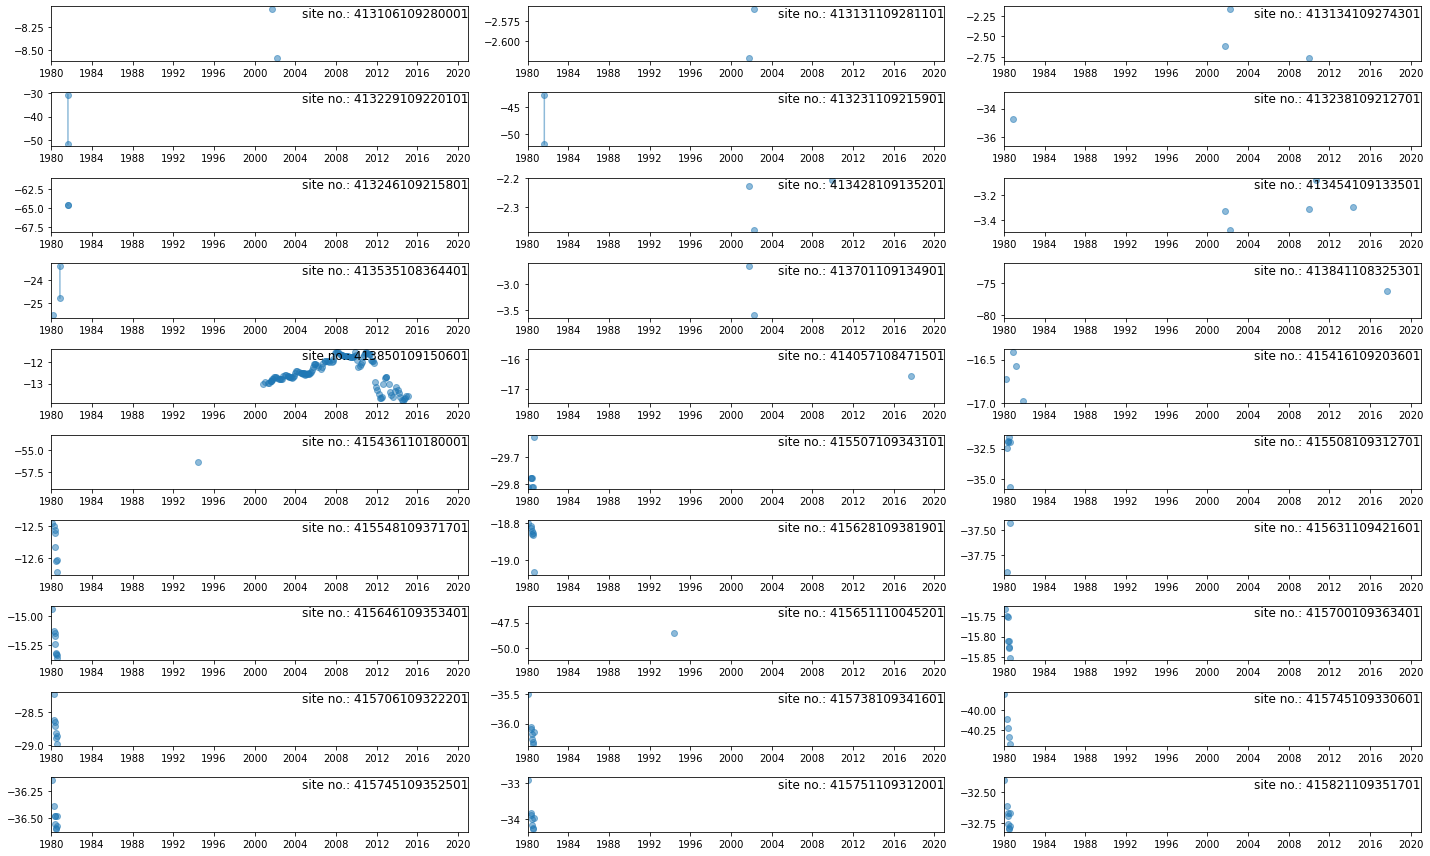

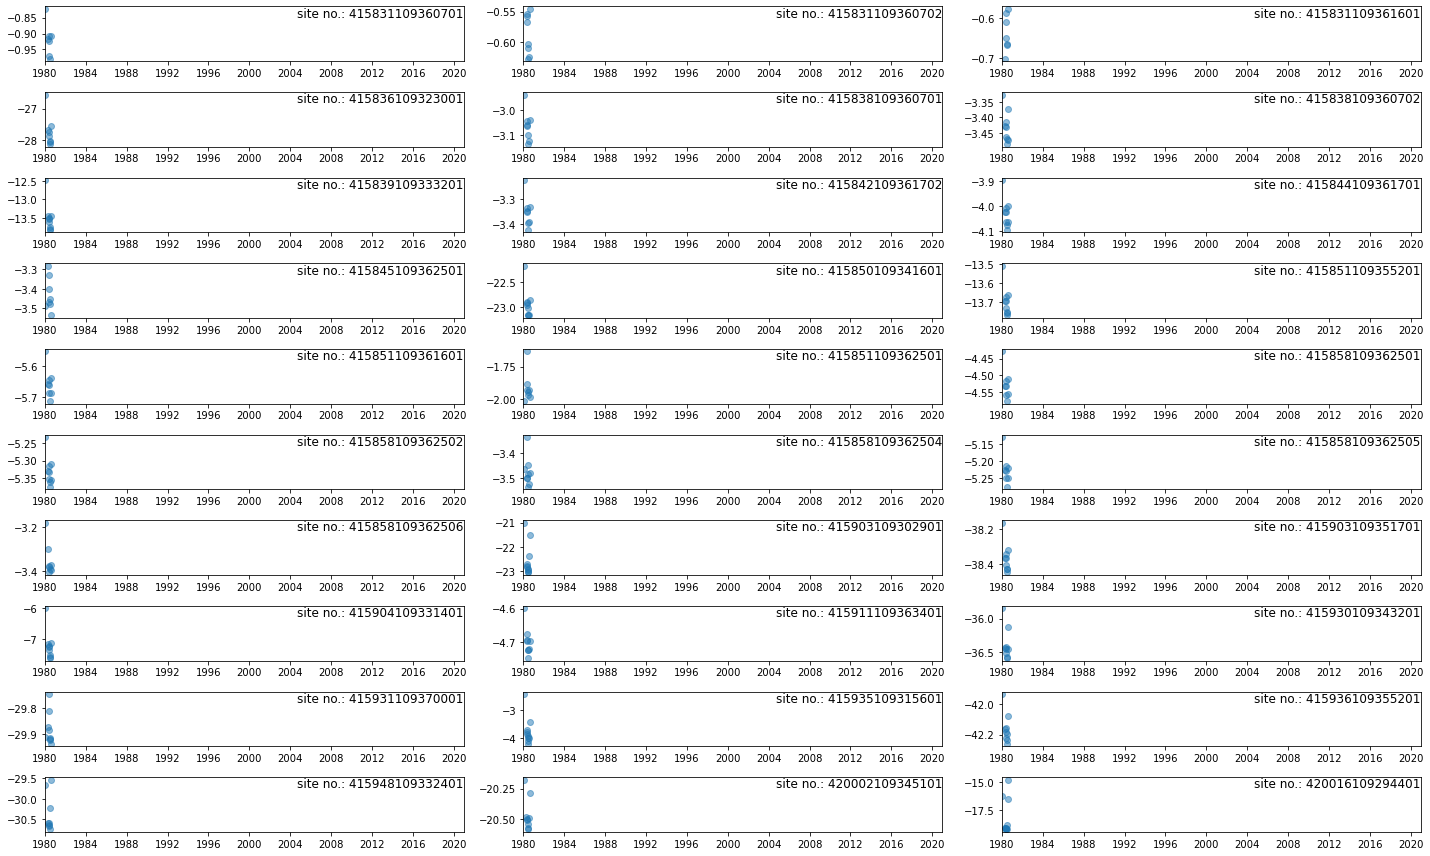

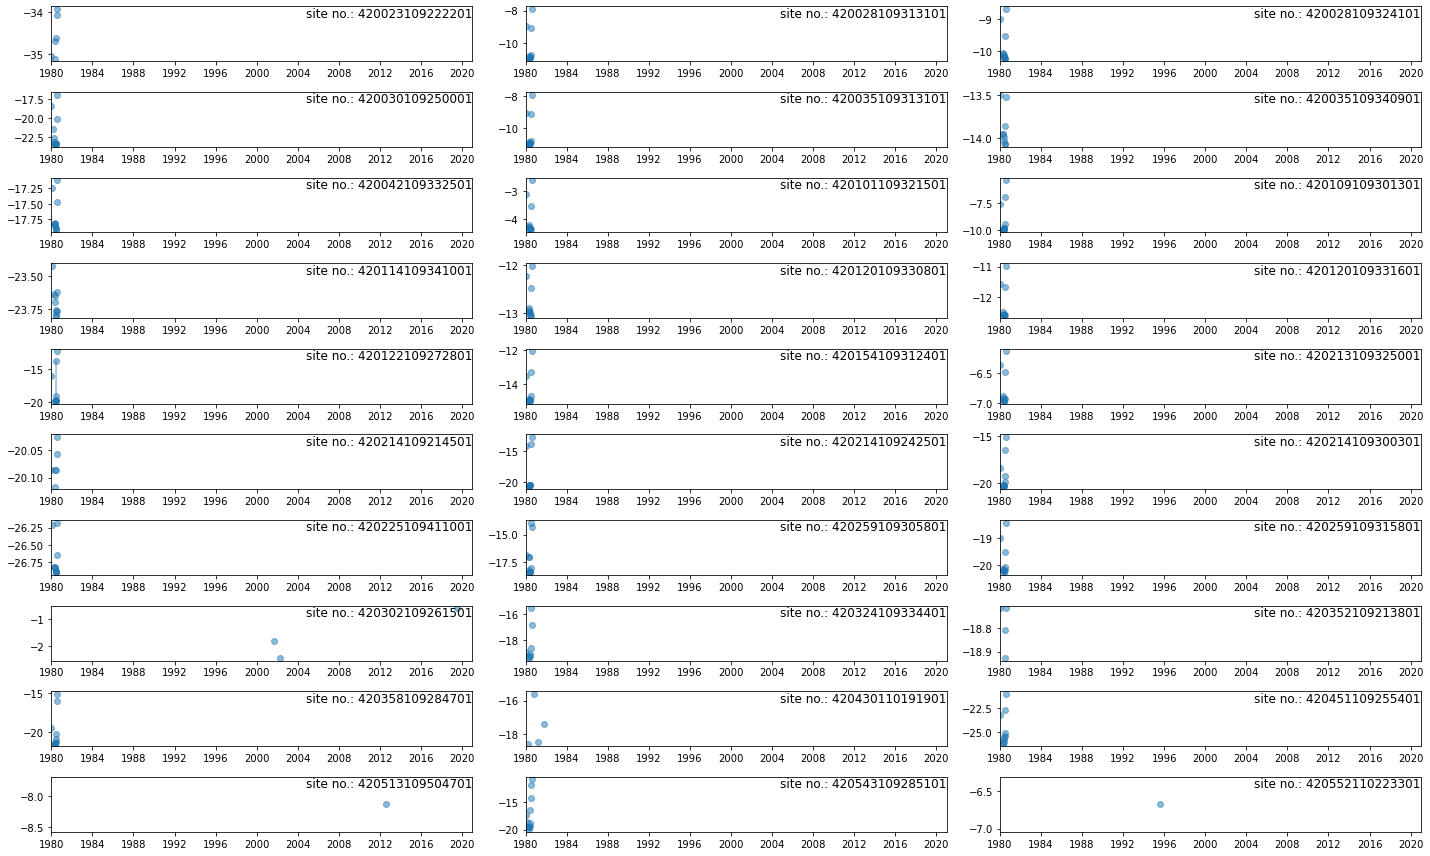

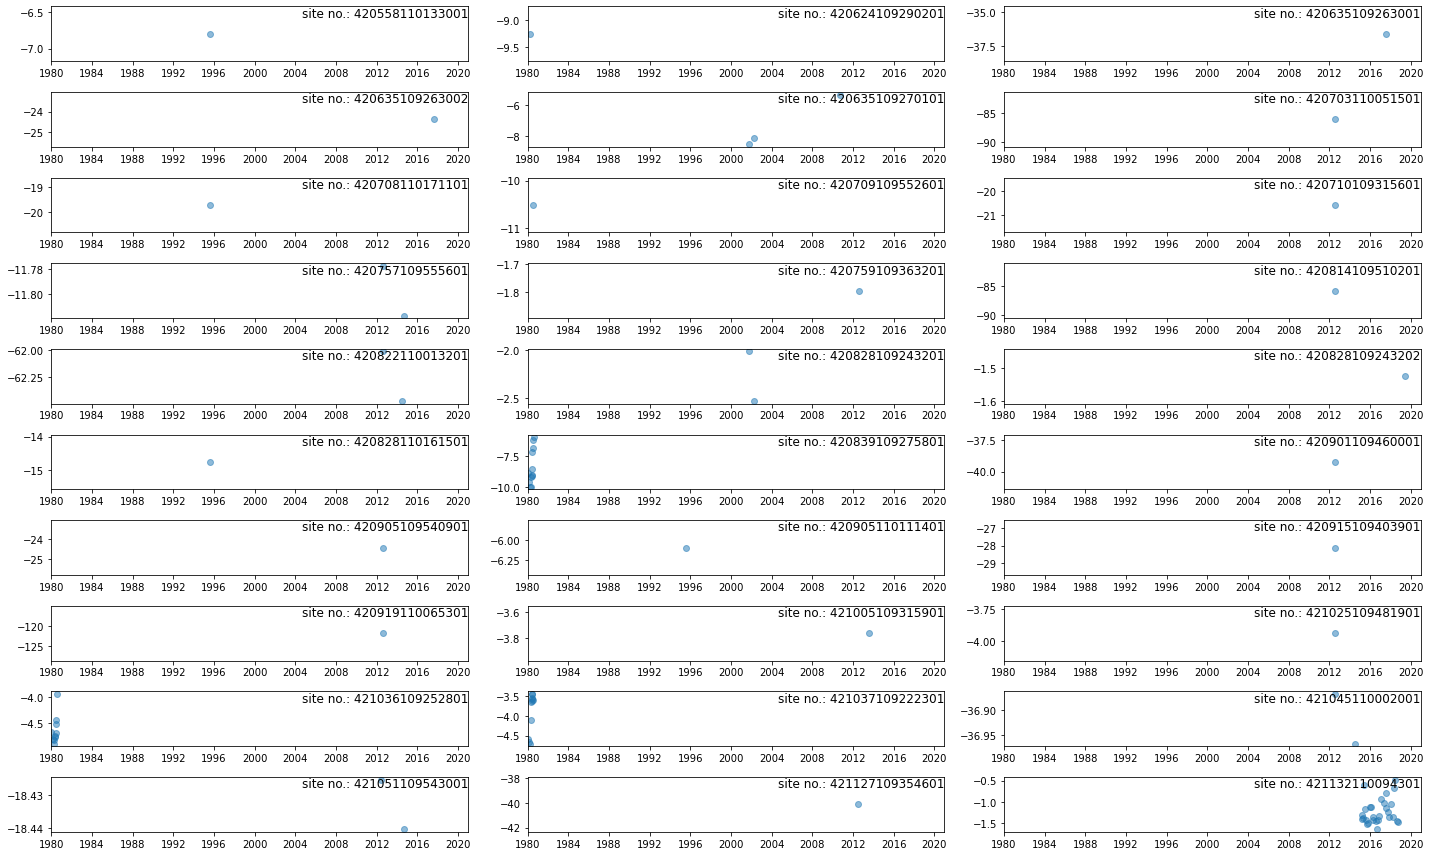

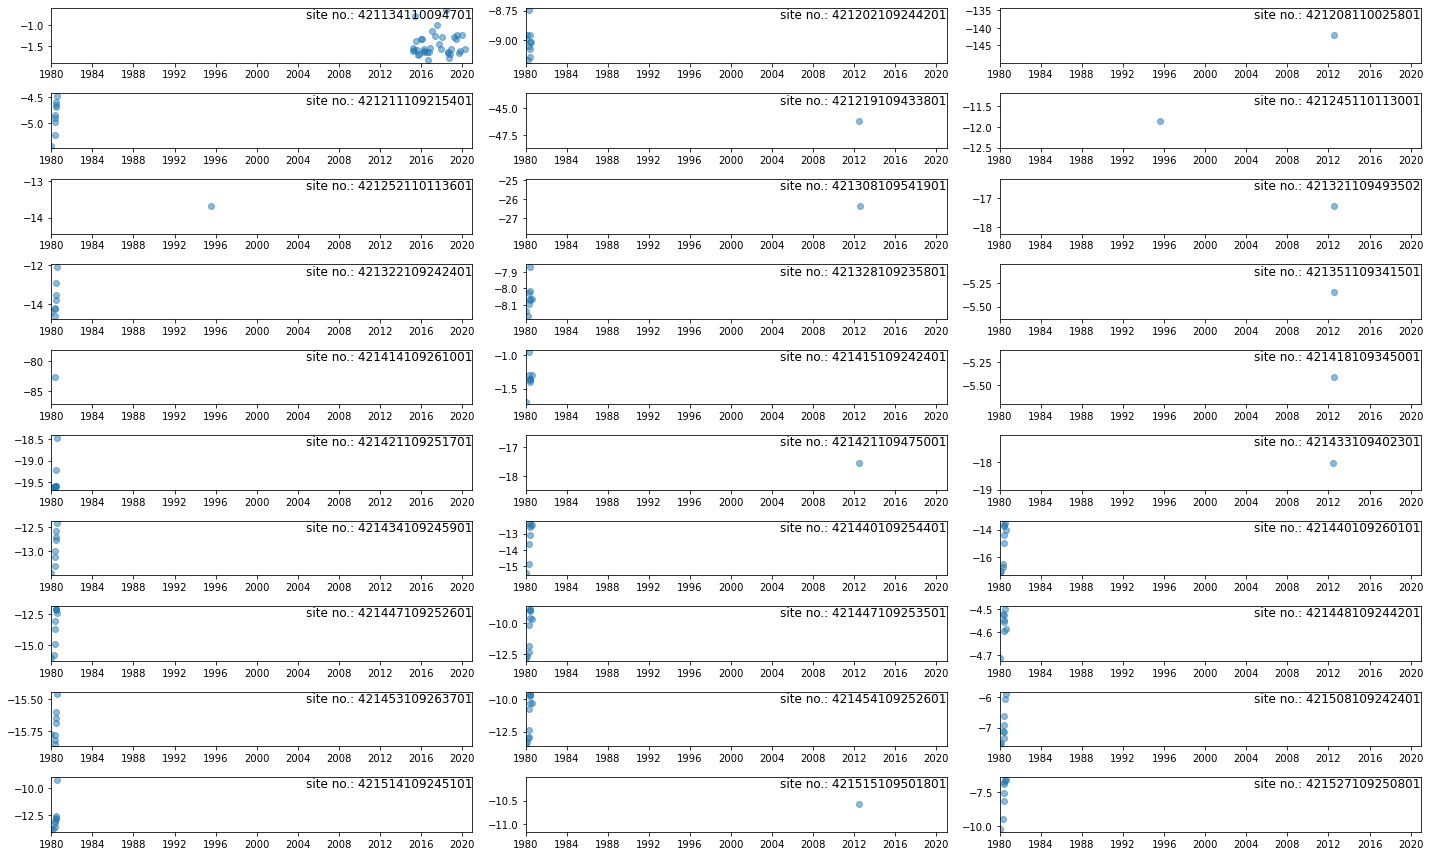

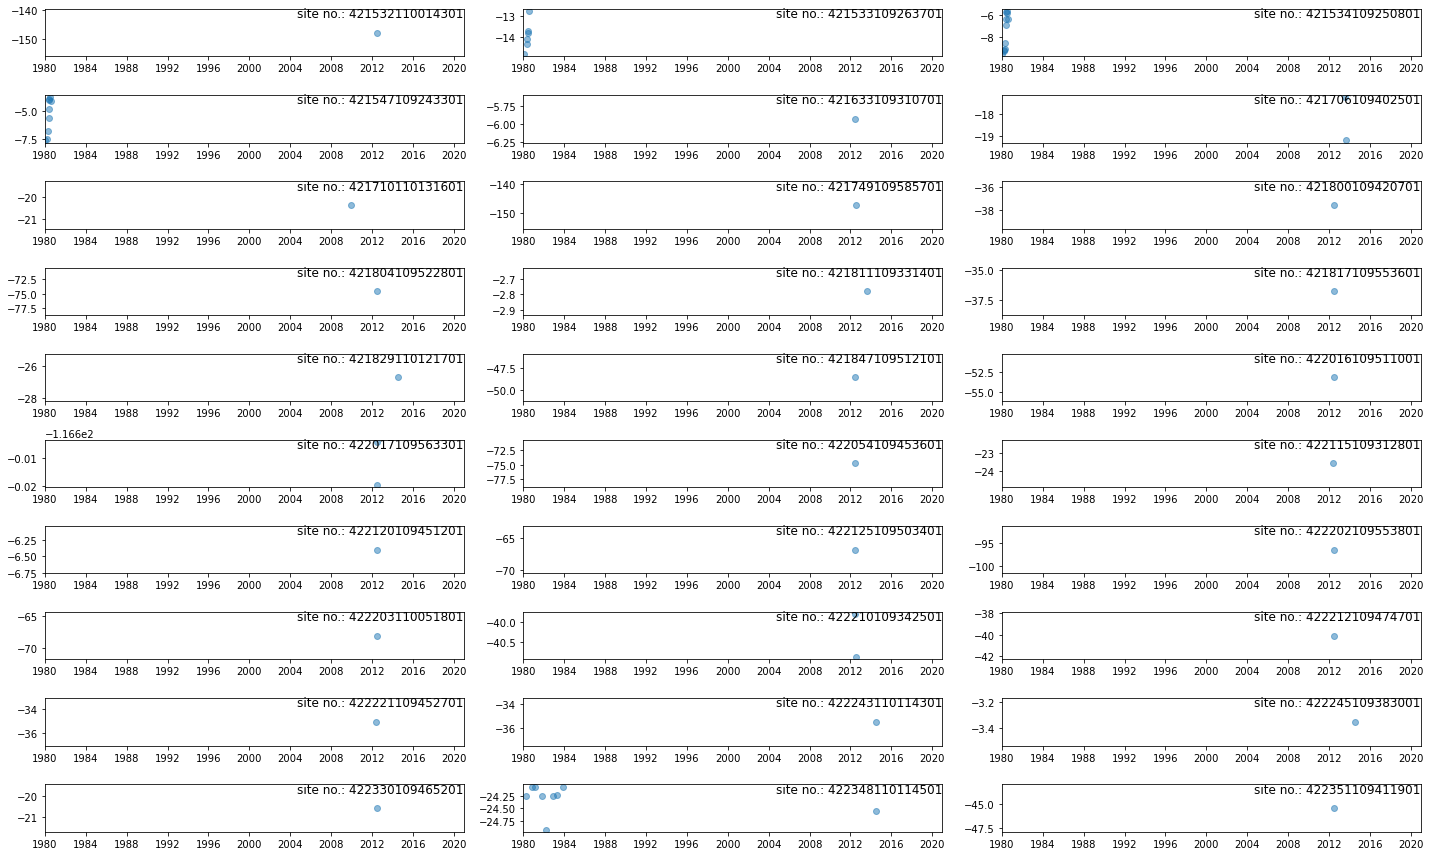

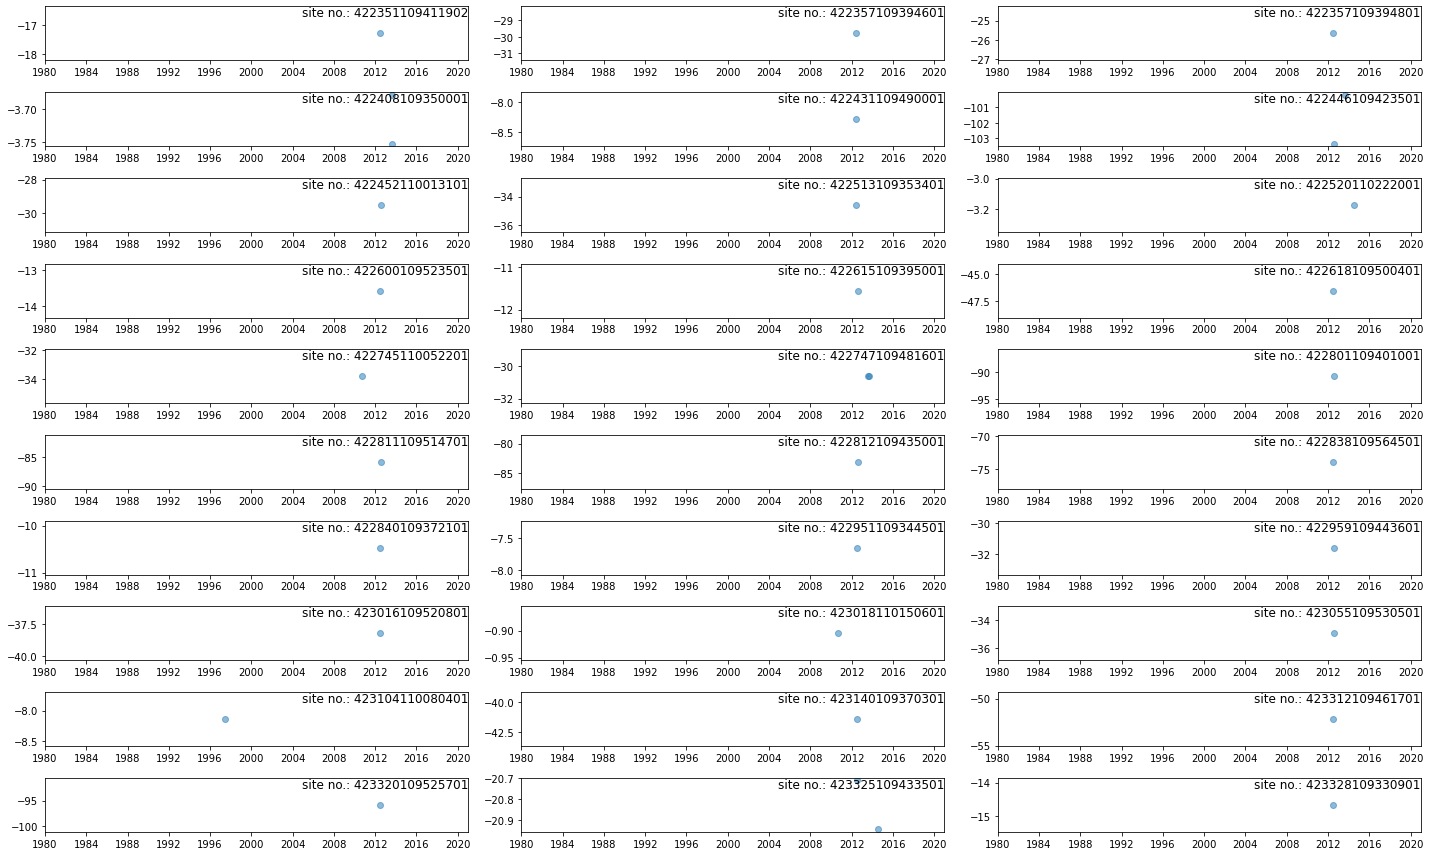

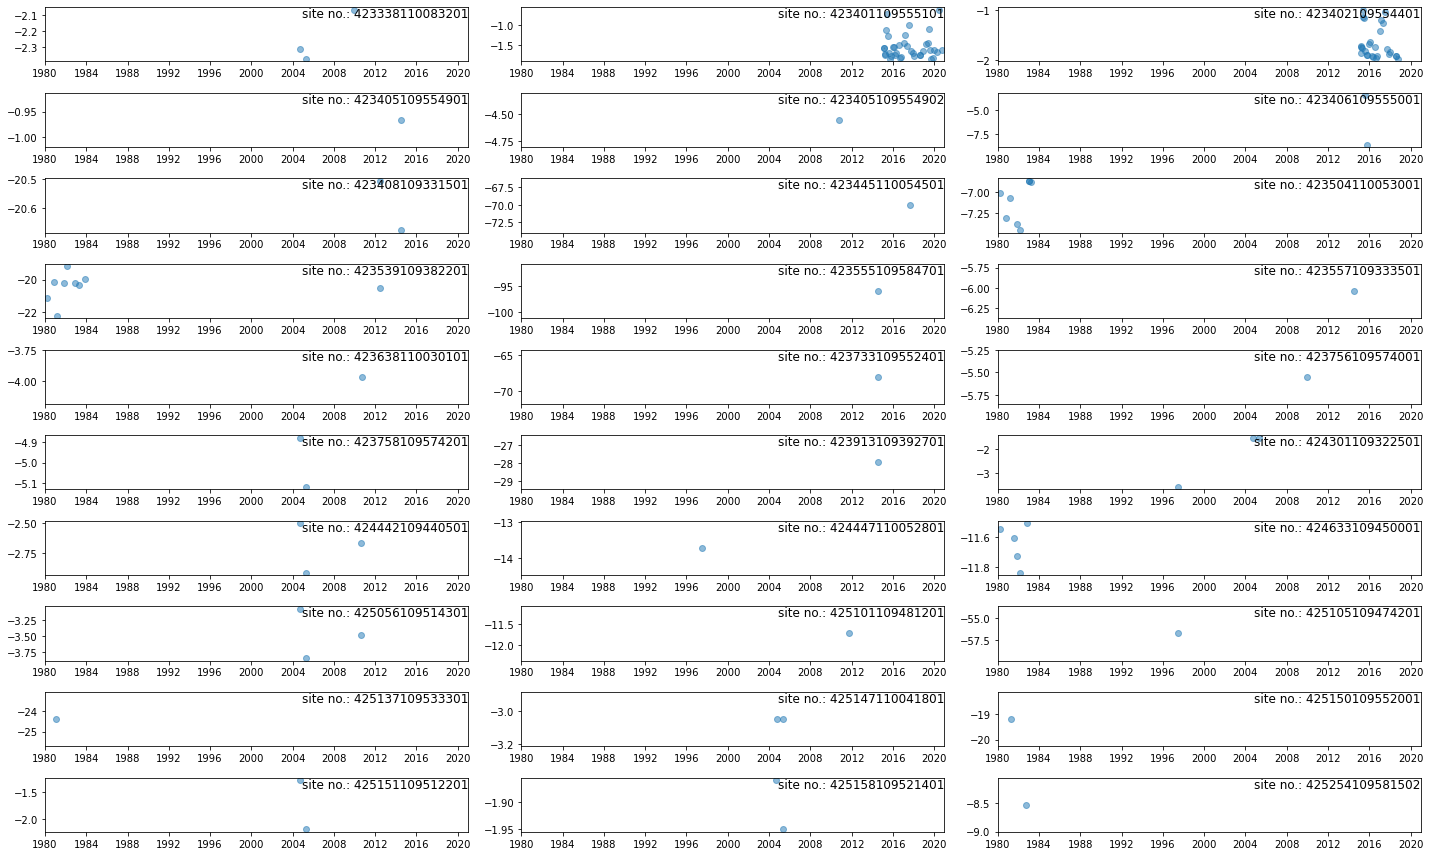

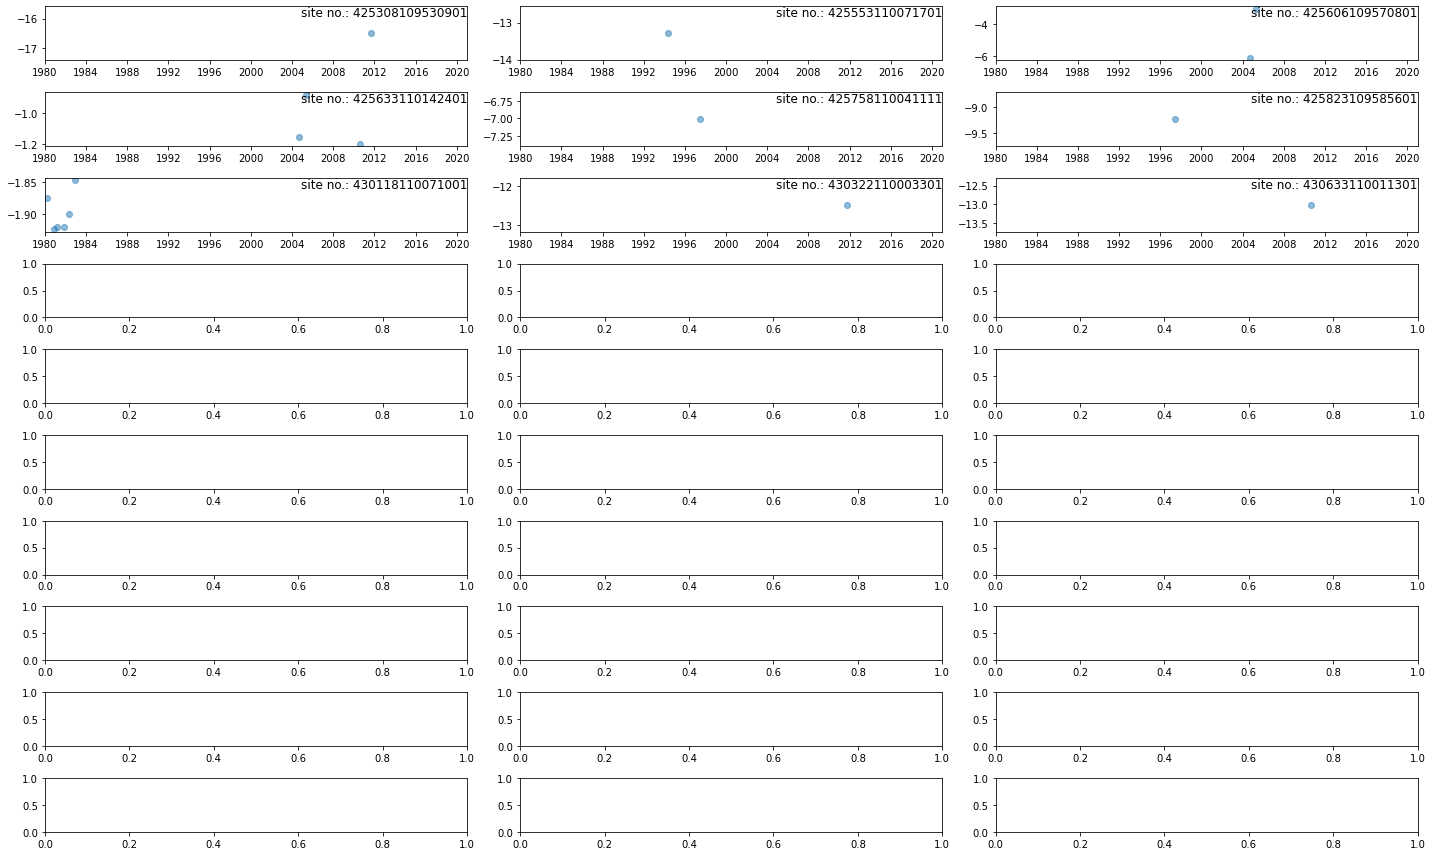

In [17]:
num_subplots = 30
row_n = num_subplots/3
pages = 9
for f in range(pages):
    fig, axes = plt.subplots(int(row_n), 3, figsize=(20, 12))
    # make a plot
    dff_sel = dff.iloc[:, num_subplots*f:num_subplots*(f+1)]
    for ax, i in zip(axes.flat, dff_sel.columns):
        ax.plot(
                dff_sel.index, dff_sel.loc[:, i], '-o',
                # facecolors="None", edgecolors='red',
                alpha=0.5,
                zorder=2,
                )
        ax.set_xlim([datetime.date(1980, 1, 1), datetime.date(2020, 12, 31)])
        # plt.legend(dff.iloc[:, :50].columns.tolist())
        ax.set_title("site no.: {}".format(i), loc='right', y=0.7)
    fig.tight_layout()
    plt.savefig('fig_{:02d}.png'.format(f), dpi=300)
    print(" - saving 'fig_{:02d}.png' ... passed".format(f))

In [6]:
dff.head()

413106109280001  413131109281101  413134109274301  \
date                                                            
1980-01-01              NaN              NaN              NaN   
1980-01-02              NaN              NaN              NaN   
1980-01-03              NaN              NaN              NaN   
1980-01-04              NaN              NaN              NaN   
1980-01-05              NaN              NaN              NaN   

            413229109220101  413231109215901  413238109212701  \
date                                                            
1980-01-01              NaN              NaN              NaN   
1980-01-02              NaN              NaN              NaN   
1980-01-03              NaN              NaN              NaN   
1980-01-04              NaN              NaN              NaN   
1980-01-05              NaN              NaN              NaN   

            413246109215801  413428109135201  413454109133501  \
date                                                            
1980-01-01              NaN              NaN              NaN   
1980-01-02              NaN              NaN              NaN   
1980-01-03              NaN              NaN              NaN   
1980-01-04              NaN              NaN              NaN   
1980-01-05              NaN              NaN              NaN   

            413535108364401  ...  425254109581502  425308109530901  \
date                         ...                                     
1980-01-01              NaN  ...              NaN              NaN   
1980-01-02              NaN  ...              NaN              NaN   
1980-01-03              NaN  ...              NaN              NaN   
1980-01-04              NaN  ...              NaN              NaN   
1980-01-05              NaN  ...              NaN              NaN   

            425553110071701  425606109570801  425633110142401  \
date                                                            
1980-01-01              NaN              NaN              NaN   
1980-01-02              NaN              NaN              NaN   
1980-01-03              NaN              NaN              NaN   
1980-01-04              NaN              NaN              NaN   
1980-01-05              NaN              NaN              NaN   

            425758110041111  425823109585601  430118110071001  \
date                                                            
1980-01-01              NaN              NaN              NaN   
1980-01-02              NaN              NaN              NaN   
1980-01-03              NaN              NaN              NaN   
1980-01-04              NaN              NaN              NaN   
1980-01-05              NaN              NaN              NaN   

            430322110003301  430633110011301  
date                                          
1980-01-01              NaN              NaN  
1980-01-02              NaN              NaN  
1980-01-03              NaN              NaN  
1980-01-04              NaN              NaN  
1980-01-05              NaN              NaN  

[5 rows x 249 columns]

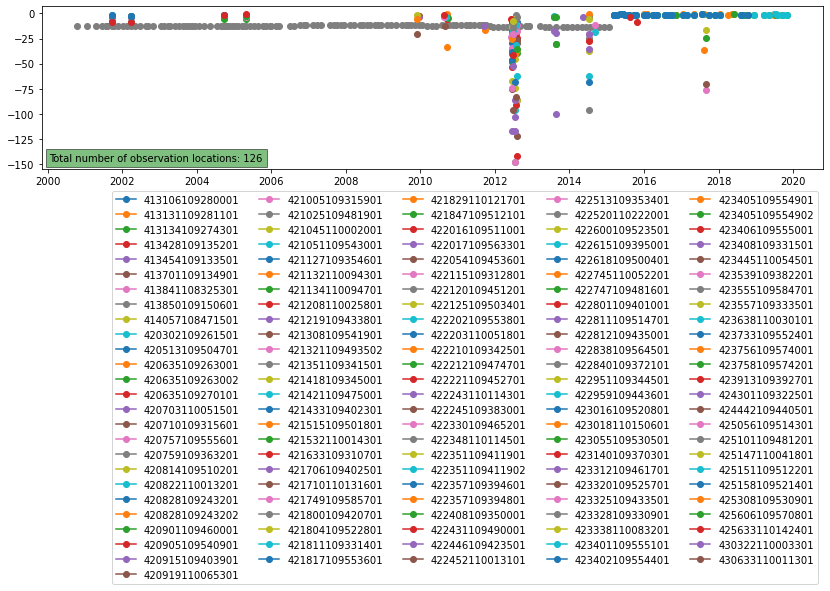

In [8]:
sel_df =  dff['1/1/2000': '12/31/2019']
min_number_of_data = 1
sel_df = sel_df.loc[:, (sel_df.notnull().sum(axis=0) >= min_number_of_data)]
num_obds = len(sel_df.columns)
fig, ax = plt.subplots(figsize=(14, 3))
for i in range(len(sel_df.columns)):
    ax.plot(sel_df.index, sel_df.iloc[:, i], '-o', label=sel_df.columns[i])

ax.text(
        0.01, 0.05,
        'Total number of observation locations: {}'.format(num_obds),
        horizontalalignment='left',fontsize=10,
        bbox=dict(facecolor='green', alpha=0.5),
        transform=ax.transAxes
        ) 

plt.legend(bbox_to_anchor=(1,-0.1), ncol=5)
plt.show()

# Change well names

In [13]:
sel_df

413106109280001  413131109281101  413134109274301  \
date                                                            
2000-01-01              NaN              NaN              NaN   
2000-01-02              NaN              NaN              NaN   
2000-01-03              NaN              NaN              NaN   
2000-01-04              NaN              NaN              NaN   
2000-01-05              NaN              NaN              NaN   
...                     ...              ...              ...   
2019-12-27              NaN              NaN              NaN   
2019-12-28              NaN              NaN              NaN   
2019-12-29              NaN              NaN              NaN   
2019-12-30              NaN              NaN              NaN   
2019-12-31              NaN              NaN              NaN   

            413428109135201  413454109133501  413701109134901  \
date                                                            
2000-01-01              NaN              NaN              NaN   
2000-01-02              NaN              NaN              NaN   
2000-01-03              NaN              NaN              NaN   
2000-01-04              NaN              NaN              NaN   
2000-01-05              NaN              NaN              NaN   
...                     ...              ...              ...   
2019-12-27              NaN              NaN              NaN   
2019-12-28              NaN              NaN              NaN   
2019-12-29              NaN              NaN              NaN   
2019-12-30              NaN              NaN              NaN   
2019-12-31              NaN              NaN              NaN   

            413841108325301  413850109150601  414057108471501  \
date                                                            
2000-01-01              NaN              NaN              NaN   
2000-01-02              NaN              NaN              NaN   
2000-01-03              NaN              NaN              NaN   
2000-01-04              NaN              NaN              NaN   
2000-01-05              NaN              NaN              NaN   
...                     ...              ...              ...   
2019-12-27              NaN              NaN              NaN   
2019-12-28              NaN              NaN              NaN   
2019-12-29              NaN              NaN              NaN   
2019-12-30              NaN              NaN              NaN   
2019-12-31              NaN              NaN              NaN   

            420302109261501  ...  425056109514301  425101109481201  \
date                         ...                                     
2000-01-01              NaN  ...              NaN              NaN   
2000-01-02              NaN  ...              NaN              NaN   
2000-01-03              NaN  ...              NaN              NaN   
2000-01-04              NaN  ...              NaN              NaN   
2000-01-05              NaN  ...              NaN              NaN   
...                     ...  ...              ...              ...   
2019-12-27              NaN  ...              NaN              NaN   
2019-12-28              NaN  ...              NaN              NaN   
2019-12-29              NaN  ...              NaN              NaN   
2019-12-30              NaN  ...              NaN              NaN   
2019-12-31              NaN  ...              NaN              NaN   

            425147110041801  425151109512201  425158109521401  \
date                                                            
2000-01-01              NaN              NaN              NaN   
2000-01-02              NaN              NaN              NaN   
2000-01-03              NaN              NaN              NaN   
2000-01-04              NaN              NaN              NaN   
2000-01-05              NaN              NaN              NaN   
...                     ...              ...              ...   
2019-12-27              NaN              Na

In [20]:
col_nam_df =  pd.read_excel("D:/Projects/Watersheds/Green/GIS/mf_obs_grids.dbf.xlsx", engine="openpyxl")
sel_df.columns = col_nam_df.name.tolist()

col_nam_df.head(10)

SITENO  cal_counts  val_counts symbol  col  row  grid_id  \
0  413106109280001           2           0    cal   57  148    17256   
1  413131109281101           2           0    cal   57  148    17256   
2  413134109274301           3           0    cal   58  148    17257   
3  413428109135201           3           0    cal   71  146    17036   
4  413454109133501           4           1   both   71  146    17036   
5  413701109134901           2           0    cal   71  143    16685   
6  413841108325301           0           1    val  109  146    17074   
7  413850109150601         112          15   both   70  141    16450   
8  414057108471501           0           1    val   96  141    16476   
9  420302109261501           2           1   both   65  109    12701   

       elev_mf   UPPER_AQUI      name  
0  1871.823260  1846.803260   wt17256  
1  1871.823260  1846.803260  wt17256b  
2  1881.017076  1851.267076   wt17257  
3  1916.793190  1892.965690   wt17036  
4  1916.793190  1892.965690  wt17036b  
5  1920.647965  1887.170465   wt16685  
6  2132.380262  2111.905262   wt17074  
7  1958.450284  1937.450284   wt16450  
8  2051.741652  2021.221652   wt16476  
9  2016.791522  1985.836522   wt12701

In [16]:
sel_df

wt17256a  wt17256b  wt17257  wt17036a  wt17036b  wt16685  wt17074  \
date                                                                            
2000-01-01       NaN       NaN      NaN       NaN       NaN      NaN      NaN   
2000-01-02       NaN       NaN      NaN       NaN       NaN      NaN      NaN   
2000-01-03       NaN       NaN      NaN       NaN       NaN      NaN      NaN   
2000-01-04       NaN       NaN      NaN       NaN       NaN      NaN      NaN   
2000-01-05       NaN       NaN      NaN       NaN       NaN      NaN      NaN   
...              ...       ...      ...       ...       ...      ...      ...   
2019-12-27       NaN       NaN      NaN       NaN       NaN      NaN      NaN   
2019-12-28       NaN       NaN      NaN       NaN       NaN      NaN      NaN   
2019-12-29       NaN       NaN      NaN       NaN       NaN      NaN      NaN   
2019-12-30       NaN       NaN      NaN       NaN       NaN      NaN      NaN   
2019-12-31       NaN       NaN      NaN       NaN       NaN      NaN      NaN   

            wt16450  wt16476  wt12701  ...  wt05432  wt05435  wt05070  \
date                                   ...                              
2000-01-01      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2000-01-02      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2000-01-03      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2000-01-04      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2000-01-05      NaN      NaN      NaN  ...      NaN      NaN      NaN   
...             ...      ...      ...  ...      ...      ...      ...   
2019-12-27      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2019-12-28      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2019-12-29      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2019-12-30      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2019-12-31      NaN      NaN      NaN  ...      NaN      NaN      NaN   

            wt05316  wt05315  wt05080  wt04609  wt04243  wt03555  wt03087  
date                                                                       
2000-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2000-01-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2000-01-03      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2000-01-04      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2000-01-05      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
...             ...      ...      ...      ...      ...      ...      ...  
2019-12-27      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2019-12-28      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2019-12-29      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2019-12-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2019-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN  

[7305 rows x 126 columns]

# Create modflow.obd file

In [19]:
os.getcwd()

'D:\\Projects\\Watersheds\\Green\\data'

In [18]:
sel_df.to_csv('testout.txt', sep='\t', na_rep='-999', float_format='%.2f')

In [134]:
cal_df = dff['1/1/2000': '12/31/2012']
min_number_of_data = 1
cal_df = cal_df.loc[:, (cal_df.notnull().sum(axis=0) >= min_number_of_data)]
cal_df = cal_df.notnull().sum(axis=0).to_frame(name='cal_counts')
cal_df.index = cal_df.index.map(str)


val_df = dff['1/1/2013': '12/31/2020']
min_number_of_data = 1
val_df = val_df.loc[:, (val_df.notnull().sum(axis=0) >= min_number_of_data)]
val_df = val_df.notnull().sum(axis=0).to_frame(name='val_counts')
val_df.index = val_df.index.map(str)



# cal_df = dff['1/1/2000': '12/31/2012']
# cal_df = cal_df.notnull().sum(axis=0).to_frame(name='cal_counts')
# cal_df.index = cal_df.index.map(str)
cal_val_df = pd.concat([cal_df, val_df], axis=1)
cal_val_df


cal_counts  val_counts
413106109280001         2.0         NaN
413131109281101         2.0         NaN
413134109274301         3.0         NaN
413428109135201         3.0         NaN
413454109133501         4.0         1.0
...                     ...         ...
423445110054501         NaN         1.0
423555109584701         NaN         1.0
423557109333501         NaN         1.0
423733109552401         NaN         1.0
423913109392701         NaN         1.0

[126 rows x 2 columns]

In [135]:
cal_val_df.to_excel('gr_cal_val_wells.xlsx', index=True)

# Export selected well locations

In [87]:
selected_well_locs = pd.DataFrame({'sel_ids':sel_df.columns.to_list()}, dtype=str)
# selected_well_locs.index = sel_df.columns.to_list()
selected_well_locs['cal'] = 'y'

In [88]:
selected_well_locs

sel_ids cal
0   413106109280001   y
1   413131109281101   y
2   413134109274301   y
3   413428109135201   y
4   413454109133501   y
..              ...  ..
95  425308109530901   y
96  425606109570801   y
97  425633110142401   y
98  430322110003301   y
99  430633110011301   y

[100 rows x 2 columns]

In [89]:
selected_well_locs.to_excel('gr_sel_well_cal.xlsx', index=False)